In [75]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time module.
import time

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [4]:
# Now that we have our ordered pairs of latitudes and longitudes in a list,
# we can iterate through the list of tuples and find the nearest city to those coordinates.

# Make sure we only capture unique cities
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))

609


In [5]:
# One format we can use to parse data is JavaScript Object Notation (JSON).
# The JSON format is also referred to as an "object" or "JSON object."

# General format
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [6]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [7]:
# Get the text of the request in JSON readable format

# Where do temperature and humidity live?
boston_data = city_weather.json()

In [8]:
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
# Create an endpoint URL for a city
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [10]:
# An alternate way to text is if we get JSON formatted data.
if city_weather.json():
    print(f'City weather found.')
else:
    print(f'City weather not found.')
    

City weather found.


In [11]:
# Start using API to retrieve specific weather data about each city

# Return the values of the key through .get()
boston_data.get('sys')

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1627897079,
 'sunset': 1627948972}

In [12]:
# Return the values of the key through each ['key'] until
# you arrive to the appropriate value
boston_data['coord']['lon']

-71.0598

In [13]:
boston_data['main']['temp_max']

78.94

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 78.94 59 40 11.01


In [15]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-08-02 16:29:59'

In [16]:
# Iterate through our cities list and retrieve the data from each city

# 1. Loop throug the list of cities and group them in sets of 50
#.   Record the 50 count for each set, and create a new set
# 2. Build the query_url for each city
# 3. Log the URL and the record and set numbers
# 4. Make an API request for each city
# 5. Parse the JSON data for the following
# 6. Add the data to a list in a dictionary format for each city 

In [17]:
# Create an empty list 

In [18]:
# # To fix this issue, we need to create 
# # another for loop to get the city from the cities list.

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [19]:
# Pseudo-run
# i = 1, won't run...until i = 50, set_count = 2, record_count = 2,
# city_url = url, etc. + 'bosaso'

In [20]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city and remove blank spaces in long 
    # city names
    city_url = url + "&q=" + city.replace(" ","+")

   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | cape town
City not found. Skipping...
Processing Record 3 of Set 1 | mergui
Processing Record 4 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 5 of Set 1 | toliary
Processing Record 6 of Set 1 | aktau
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | atuona
City not found. Skipping...
Processing Record 11 of Set 1 | barentsburg
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | tanggu
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | griffith
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | quesnel
Processing Record 18 of Set 1 | zonguldak
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | mar del pla

Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | edson
Processing Record 40 of Set 4 | shirokiy
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | ostrow wielkopolski
Processing Record 43 of Set 4 | kloulklubed
Processing Record 44 of Set 4 | canon city
Processing Record 45 of Set 4 | zavodoukovsk
Processing Record 46 of Set 4 | kapaa
City not found. Skipping...
Processing Record 47 of Set 4 | vreed en hoop
City not found. Skipping...
Processing Record 48 of Set 4 | saleaula
Processing Record 49 of Set 4 | mashhad
Processing Record 50 of Set 4 | hervey bay
Processing Record 1 of Set 5 | tambopata
Processing Record 2 of Set 5 | talnakh
City not found. Skipping...
Processing Record 3 of Set 5 | mys shmidta
Processing Record 4 of Set 5 | varazdin
Processing Record 5 of Set 5 | biak
Processing Record 6 of Set 5 | barabash
Processing Record 7 of Set 5 | talara
Processing Record 8 of Set 5 | kysyl-syr
Processing Record 9 of Set 5 | oxford
Processin

Processing Record 30 of Set 8 | faanui
Processing Record 31 of Set 8 | novoselytsya
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | rio gallegos
Processing Record 34 of Set 8 | maxixe
City not found. Skipping...
Processing Record 35 of Set 8 | sodertalje
Processing Record 36 of Set 8 | hanna
Processing Record 37 of Set 8 | dwarka
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | tulun
Processing Record 40 of Set 8 | clyde river
Processing Record 41 of Set 8 | ngunguru
Processing Record 42 of Set 8 | sibolga
Processing Record 43 of Set 8 | iralaya
Processing Record 44 of Set 8 | kropotkin
Processing Record 45 of Set 8 | aswan
Processing Record 46 of Set 8 | calbuco
Processing Record 47 of Set 8 | caborca
Processing Record 48 of Set 8 | bali chak
Processing Record 49 of Set 8 | jumla
Processing Record 50 of Set 8 | mao
Processing Record 1 of Set 9 | bitung
Processing Record 2 of Set 9 | manggar
Processing Record 3 of Set 9 | mahebourg
Processi

Processing Record 19 of Set 12 | minas
Processing Record 20 of Set 12 | padang
Processing Record 21 of Set 12 | manokwari
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | altamont
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | mae sot
Processing Record 26 of Set 12 | catamarca
City not found. Skipping...
Processing Record 27 of Set 12 | hihifo
Processing Record 28 of Set 12 | novi sanzhary
Processing Record 29 of Set 12 | toyooka
Processing Record 30 of Set 12 | nurota
Processing Record 31 of Set 12 | kohima
Processing Record 32 of Set 12 | piedecuesta
Processing Record 33 of Set 12 | alofi
Processing Record 34 of Set 12 | ormond beach
Processing Record 35 of Set 12 | de aar
Processing Record 36 of Set 12 | soe
Processing Record 37 of Set 12 | grand gaube
Processing Record 38 of Set 12 | ciudad guayana
Processing Record 39 of Set 12 | gazli
Processing Record 40 of Set 12 | sosnogorsk
Processing Record 41 of Set 12 | massakory
Processi

In [21]:
# data is in a list of dictionaries
city_data_df = pd.DataFrame(city_data)

In [22]:
# Reorder the columns by creating a new list of the rearranged 
# column names

new_column_order = ['City','Country','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,-0.6000,73.0833,80.78,75,95,5.39
1,Cape Town,ZA,-33.9258,18.4232,63.27,74,0,1.99
2,Punta Arenas,CL,-53.1500,-70.9167,44.71,61,20,25.32
3,Aktau,KZ,43.6500,51.2000,90.18,44,6,13.09
4,Shingu,JP,33.7333,135.9833,79.92,83,96,7.11
...,...,...,...,...,...,...,...,...
554,Broome,US,42.2506,-75.8330,74.01,59,1,5.01
555,Faya,SA,18.3851,42.4509,71.71,66,100,4.97
556,Vardo,NO,70.3705,31.1107,53.35,81,0,2.30
557,Porecatu,BR,-22.7558,-51.3792,77.47,38,0,0.43


In [24]:
# Create the output CSV file

output_data_file = 'weather_data/cities.csv'

# Export the City_data into a CSV file

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Get the relevant fields for dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [31]:
# Get today's data in seconds
today = time.strftime("%x")
today

'08/02/21'

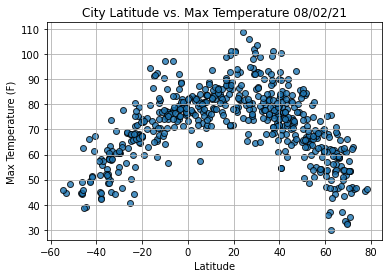

In [32]:
# Latitude vs Max Temp
plt.scatter(lats,max_temps,edgecolor='black',
            linewidths=1,marker='o',alpha=0.8, label='Cities')
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

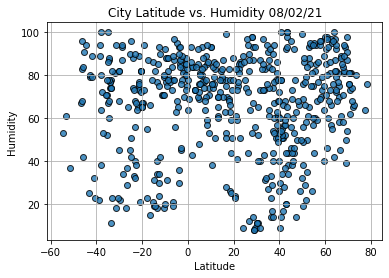

In [33]:
# Latitude vs Humidity
plt.scatter(lats,humidity,edgecolor='black',
            linewidths=1,marker='o',alpha=0.8, label='Cities')
plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

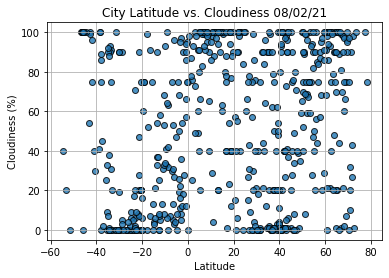

In [34]:
# Latitude vs Cloudiness
plt.scatter(lats,cloudiness,edgecolor='black',
            linewidths=1,marker='o',alpha=0.8, label='Cities')
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

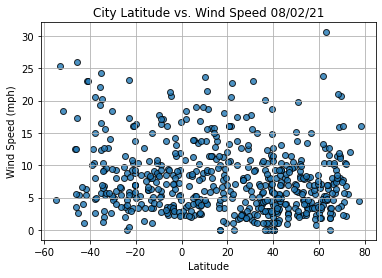

In [36]:
# Latitude vs Wind Speed
plt.scatter(lats,wind_speed,edgecolor='black',
            linewidths=1,marker='o',alpha=0.8, label='Cities')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [40]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


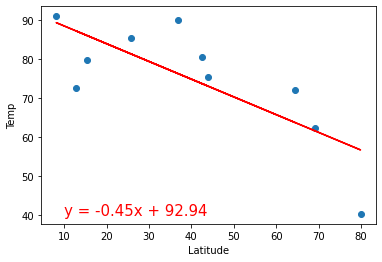

In [41]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat*slope + intercept) for lat in lats]
plt.scatter(lats,temps)
plt.plot(lats,regress_values,"r")
plt.annotate(line_eq,(10,40),fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [130]:
# Create a function to do linear regression

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression lines y values
    regress_values = [(x_value * slope + intercept) for x_value in x_values]
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ", r = " + str(round(r_value,2)) 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=13,color='red')
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [107]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Aktau,KZ,43.6500,51.2000,90.18,44,6,13.09
4,Shingu,JP,33.7333,135.9833,79.92,83,96,7.11
5,Coahuayana,MX,18.7333,-103.6833,87.28,59,12,3.40
6,Georgetown,MY,5.4112,100.3354,84.13,81,20,2.30
8,Hilo,US,19.7297,-155.0900,71.80,88,90,6.91


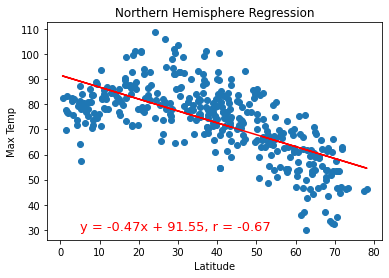

In [133]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values,y_values,'Northern Hemisphere Regression','Max Temp', (5,30))

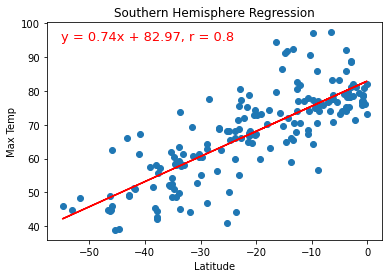

In [140]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Southern Hemisphere Regression','Max Temp', (-55,95))

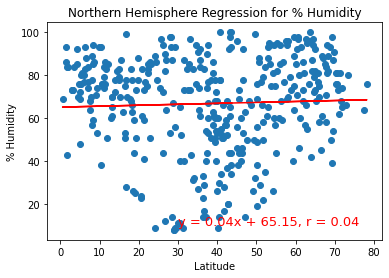

In [143]:
# Percent Humidity Graphs Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values,y_values,
        'Northern Hemisphere Regression for % Humidity','% Humidity', (30,10))

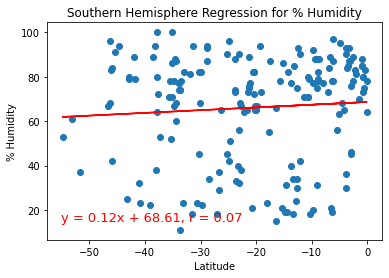

In [144]:
# Percent Humidity Graphs Southern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Southern Hemisphere Regression for % Humidity','% Humidity', (-55,15))

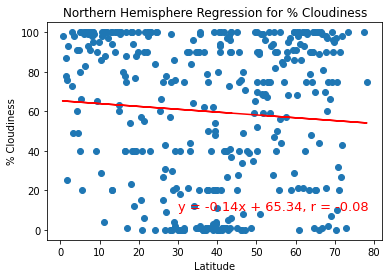

In [145]:
# Latitude vs Percent Cloudiness Northern Hemisphere

# Percent Humidity Graphs Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values,y_values,
        'Northern Hemisphere Regression for % Cloudiness','% Cloudiness', (30,10))

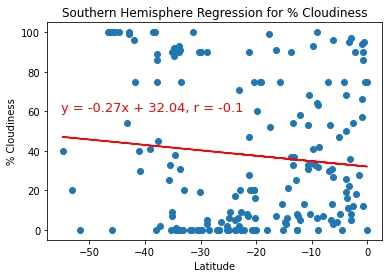

In [148]:
# Percent Humidity Graphs Southern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Southern Hemisphere Regression for % Cloudiness','% Cloudiness', (-55,60))

In [ ]:
# This means that cloudiness is unpredictable due to changing weather patterns
# that can increase or decrease percent cloudiness. Check the r-values for your plots. 

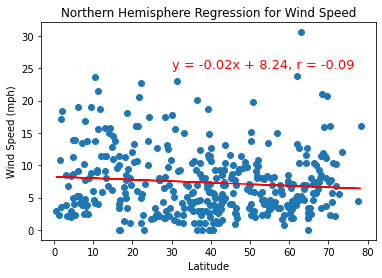

In [153]:
# Latitude vs Wind Speed Northern Hemisphere

# Percent Humidity Graphs Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values,y_values,
        'Northern Hemisphere Regression for Wind Speed','Wind Speed (mph)', (30,25))

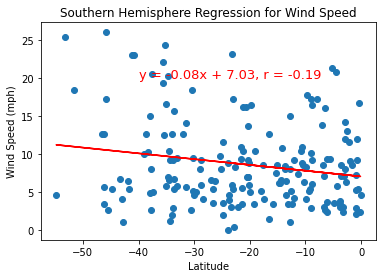

In [162]:
# Percent Humidity Graphs Southern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Southern Hemisphere Regression for Wind Speed','Wind Speed (mph)', (-40,20))